In [1]:
import requests
from io import BytesIO
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [2]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)
set_matplotlib_formats('retina')

# 다트 오픈 API 불러오기

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'}
cols = ['연결 포괄손익계산서','연결 재무상태표']
crtfc_key = '31718c7bf232574ee78e6f3f81c922043baad322'
corp_code ='005930'
company = '삼성전자'

## rcp_no 추출

In [4]:
url = 'https://opendart.fss.or.kr/api/list.xml?crtfc_key={}&corp_code={}&bgn_de=19990101&pblntf_detail_ty=A001&pblntf_detail_ty=A002&pblntf_detail_ty=A003&page_count=100'.format(crtfc_key, corp_code)

In [5]:
res = requests.get(url, headers=headers)
page = res.content.decode('UTF-8')

In [6]:
period_list = re.findall(r'<report_nm>(.*?)</report_nm>', page)
rcp_no_list = re.findall(r'<rcept_no>(.*?)</rcept_no>', page)

In [7]:
dict(zip(period_list,rcp_no_list))

{'분기보고서 (2020.09)': '20201116001248',
 '반기보고서 (2020.06)': '20200814001766',
 '분기보고서 (2020.03)': '20200515001451',
 '사업보고서 (2019.12)': '20200330003851',
 '분기보고서 (2019.09)': '20191114001273',
 '반기보고서 (2019.06)': '20190814002218',
 '분기보고서 (2019.03)': '20190515001605',
 '사업보고서 (2018.12)': '20190401004781',
 '분기보고서 (2018.09)': '20181114001530',
 '반기보고서 (2018.06)': '20180814001113',
 '분기보고서 (2018.03)': '20180515001699',
 '사업보고서 (2017.12)': '20180402005019',
 '분기보고서 (2017.09)': '20171114001694',
 '반기보고서 (2017.06)': '20170814001832',
 '분기보고서 (2017.03)': '20170515003806',
 '사업보고서 (2016.12)': '20170331004518',
 '분기보고서 (2016.09)': '20161114001491',
 '반기보고서 (2016.06)': '20160816001779',
 '분기보고서 (2016.03)': '20160516003174',
 '사업보고서 (2015.12)': '20160330003536',
 '분기보고서 (2015.09)': '20151116000976',
 '반기보고서 (2015.06)': '20150817000859',
 '분기보고서 (2015.03)': '20150515001379',
 '사업보고서 (2014.12)': '20150331002915',
 '분기보고서 (2014.09)': '20141114000755',
 '반기보고서 (2014.06)': '20140814000743',
 '분기보고서 (201

## dcm_no 추출

In [8]:
dcm_no_list = []

for rcp_no in rcp_no_list:
    res = requests.get('http://dart.fss.or.kr/dsaf001/main.do?rcpNo={}'.format(rcp_no))
    page = res.content.decode('utf-8')
    dcm_no = re.findall(r"{}', '(.*?)',".format(rcp_no), page)[0]
    dcm_no_list.append(dcm_no)

## 데이터 다운로드

In [9]:
dcm_no_list

['7549051',
 '7446167',
 '7341446',
 '7202455',
 '6958001',
 '6846651',
 '6738798',
 '6616741',
 '6382016',
 '6282263',
 '6180129',
 '6060273',
 '5845320',
 '5752868',
 '5653406',
 '5540271',
 '5349987',
 '5261457',
 '5146351',
 '5026126',
 '4854164',
 '4770098',
 '4669876',
 '4556583',
 '4384460',
 '4299541',
 '4215971',
 '4114631',
 '3952512',
 '3875930',
 '3803552',
 '3714646',
 '3560249',
 '3493599',
 '3332300',
 '3422441',
 '3207134',
 '3151930',
 '3138683',
 '2965731',
 '3067153',
 '2831348',
 '2762561',
 '2591647',
 '2695124',
 '2455237',
 '2384079',
 '2191599',
 '2309913',
 '2055378',
 '2003746',
 '1864870',
 '1944550',
 '1751900',
 '1700372',
 '1574002',
 '1644600',
 '1471142',
 '1432656',
 '1429298',
 '1321907',
 '1383787',
 '1202395',
 '1156947',
 '1049370',
 '1104240',
 '947352',
 '908765',
 '809100',
 '863843',
 '703011',
 '660953',
 '570539',
 '618045',
 '582896',
 '469435',
 '431170',
 '353722',
 '396273',
 '263890',
 '237424',
 '178927',
 '206571',
 '113424',
 '89871',


In [10]:
def down_excel(period,rcp_no,dcm_no,company):
    url = 'http://dart.fss.or.kr/pdf/download/excel.do?rcp_no={}&dcm_no={}&lang=ko'.format(rcp_no,dcm_no)
    resp = requests.get(url, headers = headers)
    table = BytesIO(resp.content)
    for sheet in cols:
        df = pd.read_excel(table, sheet_name = sheet, skiprows = 5)
        df.to_csv(str(period) + company + sheet + '.csv',encoding='utf-8-sig')

In [11]:
for period, rcp_no, dcm_no in zip(period_list, rcp_no_list, dcm_no_list):
    down_excel(period, rcp_no, dcm_no, company)

TypeError: expected str, bytes or os.PathLike object, not NoneType

# 불러온 데이터 분석

In [12]:
rcp_no_list = re.findall(r'<rcept_no>(.*?)</rcept_no>', page)

## 리스트 내 특정 문자를 갖는 문자열 추출

In [13]:
search = '포괄손익계산서'
data_list = os.listdir()

match_list = list()
for word in data_list:
    if search in word:
        match_list.append(word)
match_list

['[기재정정]반기보고서 (2011.06)삼성전자연결 포괄손익계산서.csv',
 '[첨부추가]사업보고서 (2011.12)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2011.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2012.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2013.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2014.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2015.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2016.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2017.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2018.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2019.06)삼성전자연결 포괄손익계산서.csv',
 '반기보고서 (2020.06)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2011.09)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2012.03)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2012.09)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2013.03)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2013.09)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2014.03)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2014.09)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2015.03)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2015.09)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2016.03)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2016.09)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2017.03)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2017.09)삼성전자연결 포괄손익계산서.csv',
 '분기보고서 (2018.03)삼성전자연결 포괄손익계산서.csv',


## 전체 데이터, 포괄손익계산서에서  당기순이익(손실) 추출 

In [14]:
pl = {}

for filename in match_list:
    df = pd.read_csv('./{}'.format(filename), encoding='utf-8-sig')
    df_boolean = df == '당기순이익(손실)'
    x = df_boolean.sum(axis=1).values.argmax()
    y = df_boolean.sum(axis=0).values.argmax()
    num = df.iloc[x,y+1]
    pl[filename[7:14]] =  num

In [15]:
pl

{'기보고서 (2': '3506364',
 '업보고서 (2': '13734067',
 '2011.06': '3506364',
 '2012.06': '5193420',
 '2013.06': '7773811',
 '2014.06': '6250781',
 '2015.06': '5752297',
 '2016.06': '5847393',
 '2017.06': '11053851',
 '2018.06': '11043412',
 '2019.06': '5180576',
 '2020.06': '5555083',
 '2011.09': '3441710',
 '2012.03': '5048461',
 '2012.09': '6564927',
 '2013.03': '7154941',
 '2013.09': '8244736',
 '2014.03': '7574441',
 '2014.09': '4222345',
 '2015.03': '4625815',
 '2015.09': '5458559',
 '2016.03': '5252803',
 '2016.09': '4537855',
 '2017.03': '7684354',
 '2017.09': '11193411',
 '2018.03': '11688544',
 '2018.09': '13150715',
 '2019.03': '5043585',
 '2019.09': '6287664',
 '2020.03': '4884926',
 '2020.09': '9360693',
 '2012.12': '23845285',
 '2013.12': '30474764',
 '2014.12': '23394358',
 '2015.12': '19060144',
 '2016.12': '22726092',
 '2017.12': '42186747',
 '2018.12': '44344857',
 '2019.12': '21738865',
 ' 포괄손익계산': '과 목'}

In [16]:
# 기간 정렬
sort = sorted(pl)[2:-2]

In [17]:
# 키 값들 정렬
pl_new = {}

summation = 0
for i, period in zip(range(30),sort):
    remain = i%4
    if remain == 3:
        print(i, period, int(pl[period]) - summation)
        pl_new[period] = int(pl[period]) - summation
        summation = 0
    else:
        summation = summation + int(pl[period])
        print(i, period, pl[period])
        print(summation)
        pl_new[period] = int(pl[period])

0 2011.09 3441710
3441710
1 2012.03 5048461
8490171
2 2012.06 5193420
13683591
3 2012.09 -7118664
4 2012.12 23845285
23845285
5 2013.03 7154941
31000226
6 2013.06 7773811
38774037
7 2013.09 -30529301
8 2013.12 30474764
30474764
9 2014.03 7574441
38049205
10 2014.06 6250781
44299986
11 2014.09 -40077641
12 2014.12 23394358
23394358
13 2015.03 4625815
28020173
14 2015.06 5752297
33772470
15 2015.09 -28313911
16 2015.12 19060144
19060144
17 2016.03 5252803
24312947
18 2016.06 5847393
30160340
19 2016.09 -25622485
20 2016.12 22726092
22726092
21 2017.03 7684354
30410446
22 2017.06 11053851
41464297
23 2017.09 -30270886
24 2017.12 42186747
42186747
25 2018.03 11688544
53875291
26 2018.06 11043412
64918703
27 2018.09 -51767988
28 2018.12 44344857
44344857
29 2019.03 5043585
49388442


## 시각화 예제 실습

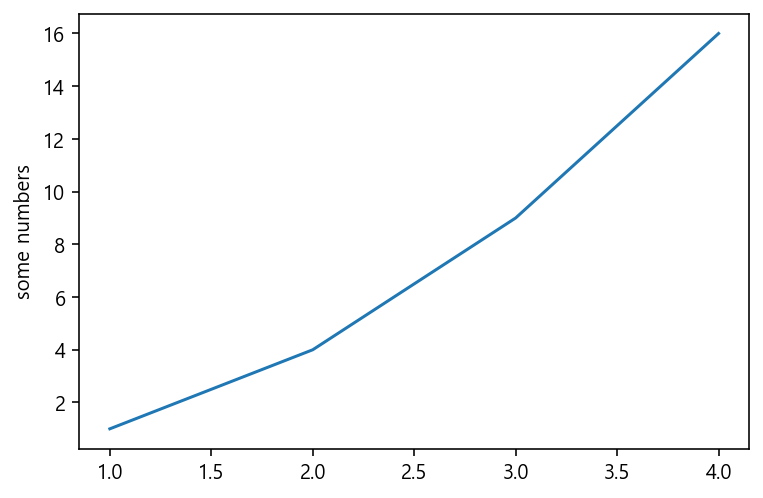

In [18]:
plt.plot([1, 2, 3, 4], [1,4,9,16])
plt.ylabel('some numbers')
plt.show()

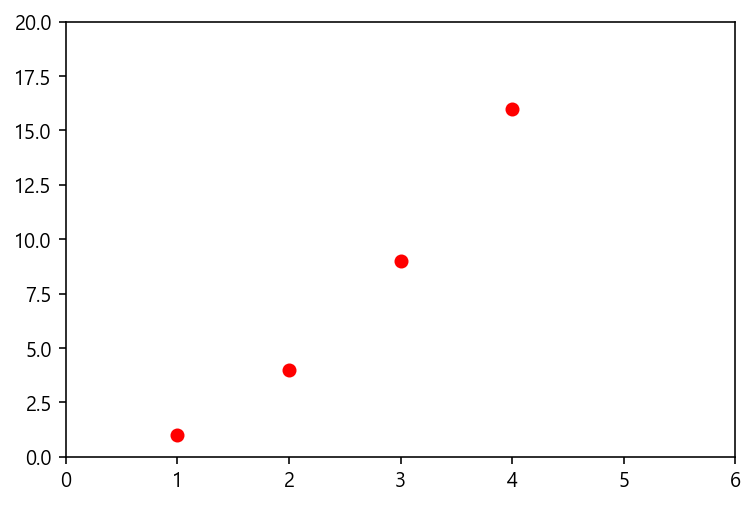

In [19]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # r : 색 , o : marker
plt.axis([0, 6, 0, 20])
plt.show()

## 삼성전자 당기순이익 시각화

In [20]:
pl_new.values()

dict_values([3441710, 5048461, 5193420, -7118664, 23845285, 7154941, 7773811, -30529301, 30474764, 7574441, 6250781, -40077641, 23394358, 4625815, 5752297, -28313911, 19060144, 5252803, 5847393, -25622485, 22726092, 7684354, 11053851, -30270886, 42186747, 11688544, 11043412, -51767988, 44344857, 5043585])

In [24]:
pl_new

{'2011.09': 3441710,
 '2012.03': 5048461,
 '2012.06': 5193420,
 '2012.09': -7118664,
 '2012.12': 23845285,
 '2013.03': 7154941,
 '2013.06': 7773811,
 '2013.09': -30529301,
 '2013.12': 30474764,
 '2014.03': 7574441,
 '2014.06': 6250781,
 '2014.09': -40077641,
 '2014.12': 23394358,
 '2015.03': 4625815,
 '2015.06': 5752297,
 '2015.09': -28313911,
 '2015.12': 19060144,
 '2016.03': 5252803,
 '2016.06': 5847393,
 '2016.09': -25622485,
 '2016.12': 22726092,
 '2017.03': 7684354,
 '2017.06': 11053851,
 '2017.09': -30270886,
 '2017.12': 42186747,
 '2018.03': 11688544,
 '2018.06': 11043412,
 '2018.09': -51767988,
 '2018.12': 44344857,
 '2019.03': 5043585}

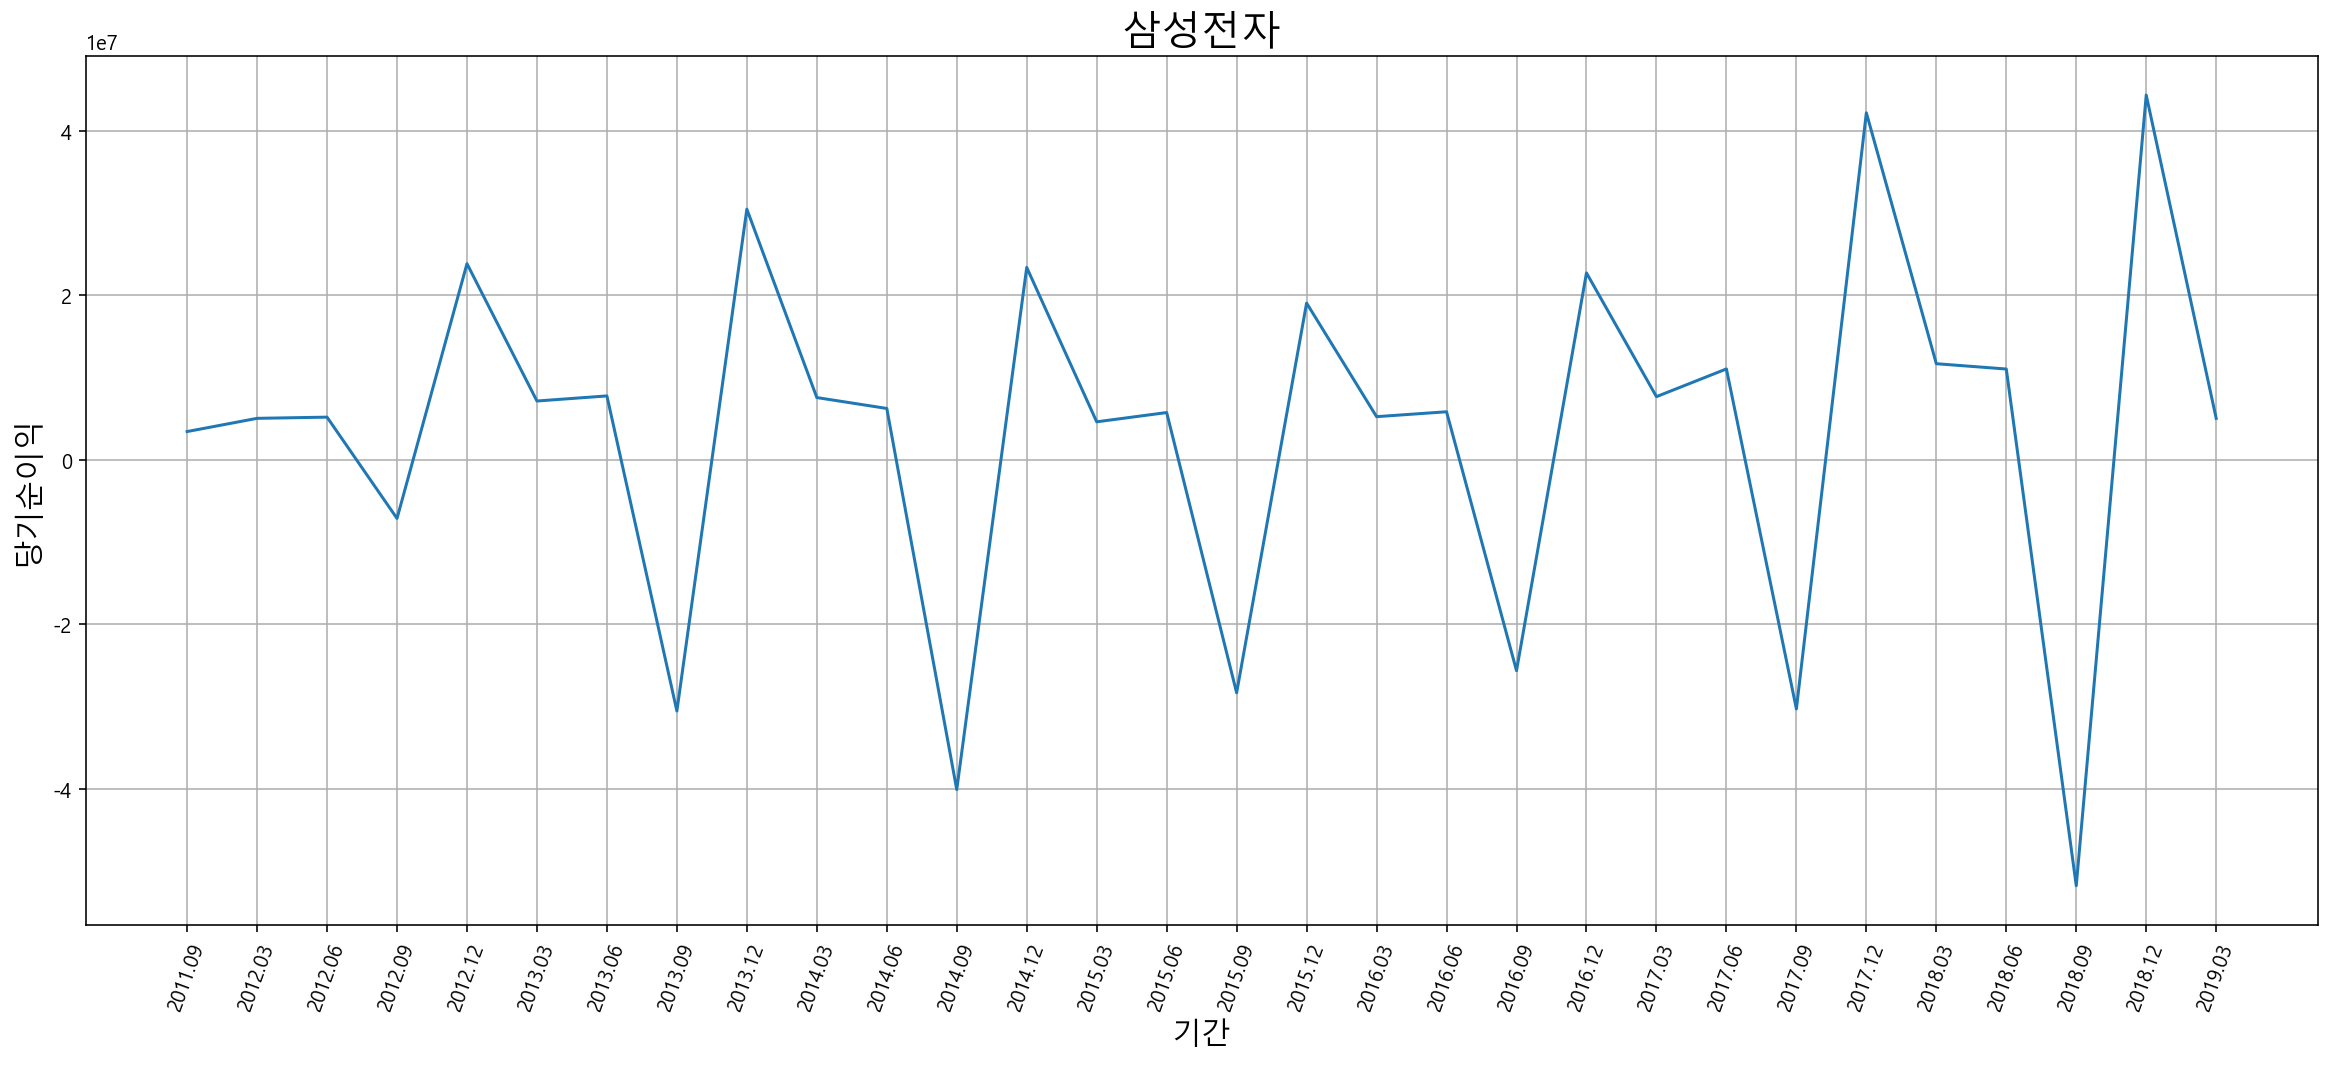

In [21]:
plt.figure(figsize=(20,8))
plt.plot(pl_new.values())
plt.title('삼성전자', fontsize = 20)
plt.xlabel('기간',fontsize = 15)
plt.ylabel('당기순이익', fontsize = 15)
plt.xticks(np.arange(30), pl_new.keys(), rotation = 70)
plt.grid()

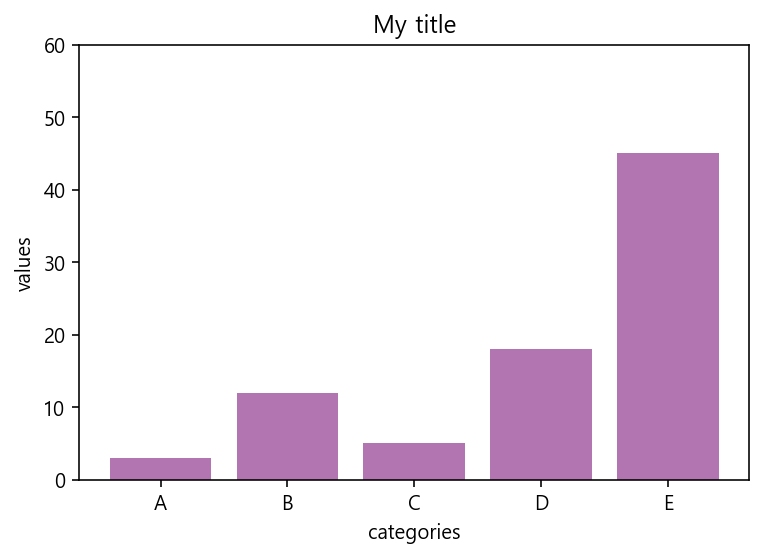

In [22]:
import numpy as np
import matplotlib.pyplot as plt
 
# Fake dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')
 
# Limits for the Y axis
plt.ylim(0,60)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


In [23]:

5.2 바로 아래 위치 백업

df_list = list()

if corp_nm == '삼성생명':
    for i, df_nm in enumerate(match_list):
        df = pd.read_csv('./{}'.format(df_nm), encoding='utf-8-sig')
        if corp_nm == '삼성생명':
            df = df.iloc[:,1:3]
            df = df[df['과 목'].notnull()]
            df['과 목'] = df['과 목'].str.split('.').str[-1]
            df['과 목'] = df['과 목'].str.split('(').str[0]
            df['과 목'] = df['과 목'].str.strip().copy()
            df.rename(columns = {'과 목' : '계정과목'}, inplace = True)
            df_list.append(df)
else:
    for i, df_nm in enumerate(match_list):
        df = pd.read_csv('./{}'.format(df_nm), encoding='utf-8-sig')
        df = df.drop(0) # 여기서 부터 타보험사 수정
        df = df.iloc[:,1:5].drop('주 석', axis=1)
        df = df.iloc[:,::2]
        df = df[df['과 목'].notnull()]
        df['과 목'] = df['과 목'].str.split('.').str[-1]
        df['과 목'] = df['과 목'].str.split('(').str[0]
        df['과 목'] = df['과 목'].str.strip().copy()
        df.rename(columns = {'과 목' : '계정과목'}, inplace = True)
        df_list.append(df)

SyntaxError: invalid syntax (<ipython-input-23-18ea726228ac>, line 1)